In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Loading & Exploration

In [80]:
# Load titanic dataset
df = sns.load_dataset('titanic')

In [81]:
# Display first 10 rows
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [82]:
# Count missing values in each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [83]:
# Display column names
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [84]:
# Show unique values in the embarked column.
df['embarked'].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object>

# Data Cleaning

In [85]:
# Fill missing embarked with the most frequent value.
mfv = df['embarked'].mode()
df['embarked'] = df['embarked'].fillna(mfv)
mfv

0    S
Name: embarked, dtype: object

In [86]:
# Convert sex and class to categorical type.
categorical_cols = ['sex', 'class']

for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.7+ KB


In [87]:
#  Create a new column family_size= sibsp + parch + 1. 
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['family_size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family_size, Length: 891, dtype: int64

In [88]:
# Cap fare at the 99th percentile to reduce outlier impact.
P99 = df['fare'].quantile(0.99)
df['fare'] = df['fare'].clip(upper=P99)
P99

np.float64(249.00622000000035)

# Visualization

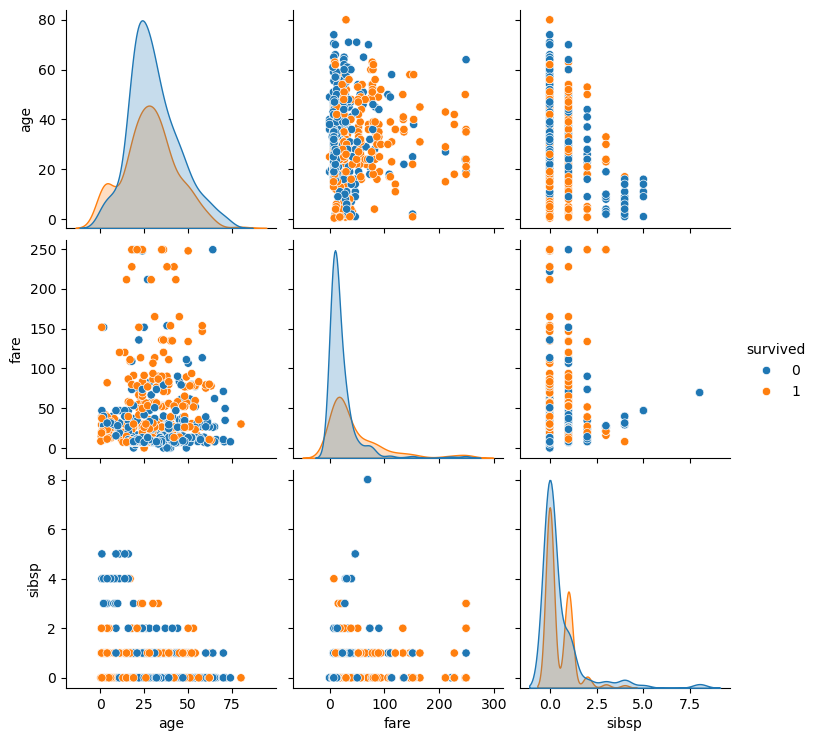

In [89]:
# Pairplot of ['age', 'fare', 'sibsp'] colored by survived.
sns.pairplot(data=df, vars=['age', 'fare', 'sibsp'], hue='survived')
plt.show()

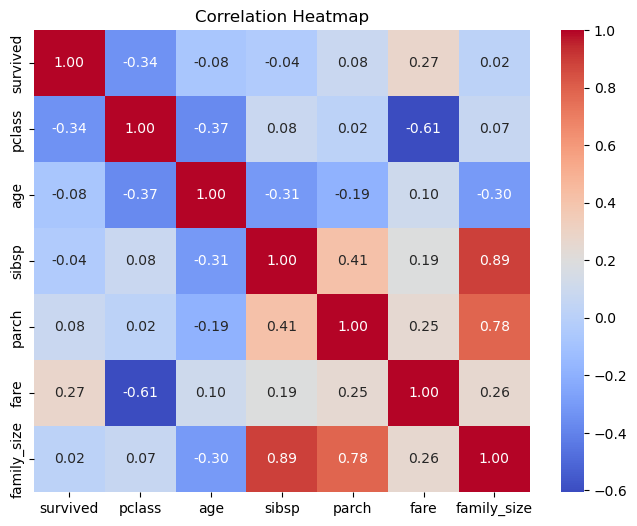

In [90]:
# Heatmap of correlations for numeric columns.
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

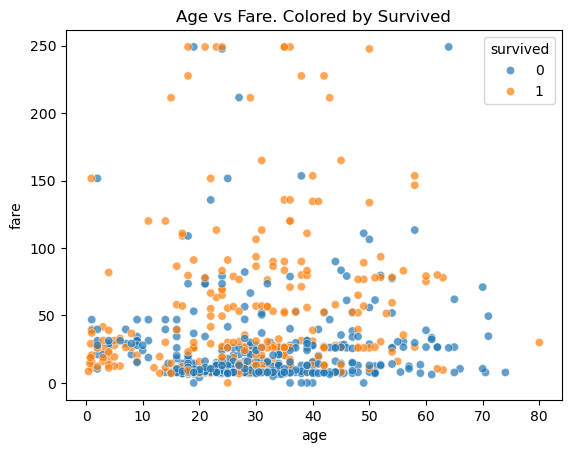

In [91]:
# Scatter plot of age vs fare, colored by survived. 
sns.scatterplot(data=df, x='age', y='fare', hue='survived', alpha=0.7)
plt.title("Age vs Fare. Colored by Survived")
plt.show()

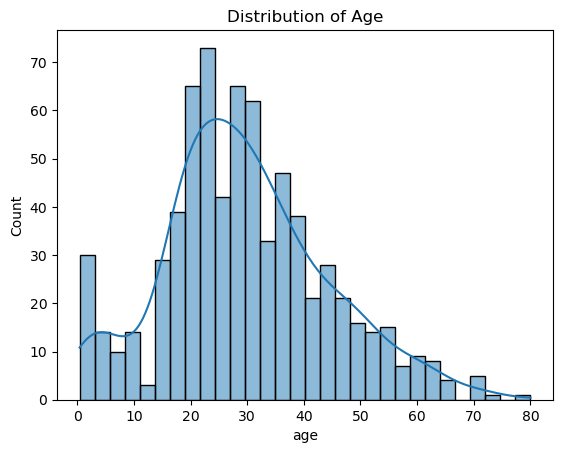

In [94]:
# Plot a histogram of age with 30 bins and KDE
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()